<a href="https://colab.research.google.com/github/colmBandit/ColabML/blob/main/Introduction_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import os

data_path = '/content/Iris_Data.csv.xls'


In [5]:
import numpy as np
import pandas as pd

data_path = ['/content/Iris_Data.csv.xls']
filepath = os.sep.join(data_path)
data = pd.read_csv(filepath)
data.head(4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
data.shape

(150, 5)

In [9]:
data.shape[1]

5

In [10]:
print(data.shape[1])

5


In [11]:
#number of rows
print(data.shape[0])

#column names
print(data.columns.tolist())

#data types
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [12]:
data['species']=data.species.apply(lambda r:r.replace('Iris-',''))

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#one way to count each species
print(data.species.value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [15]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
stats_df= data.describe()
stats_df.loc['range']= stats_df.loc['max'] - stats_df.loc['min']

In [18]:
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [19]:
out_fields=['mean','25%','50%','75%','range']
stats_df= stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [20]:
#QUESTION 4
#group by mean
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [21]:
#group by median
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [22]:
data.groupby('species').agg(['mean', 'median'])
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [23]:
#for fields which need to be aggregated differently
from pprint import pprint

agg_dict={field: ['mean','median'] for field in data.columns if field !='species'}
agg_dict['petal_length']= 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

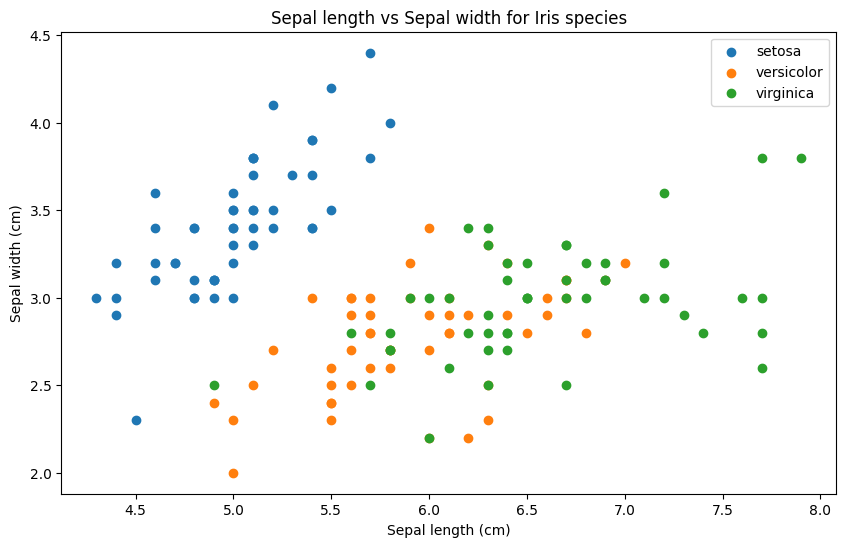

In [28]:
#QUESTION 5
#scatter graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for species in data['species'].unique():
    subset = data[data['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal length vs Sepal width for Iris species')
plt.legend()
plt.show()